<a href="https://colab.research.google.com/github/HakanBayazitHabes/VGG16-ObjectDetection-CNN/blob/master/VGG16_NesneTanima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMAGENET - VGG16 - NESNE TANIMA

---


**Colab** için kimlik doğrulama adımları

In [2]:
from google.colab import drive
drive.mount("/gdrive")
%cd /gdrive

Mounted at /gdrive
/gdrive


**Google Drive** içinde ve doğru klasörde bulunmamız için gerekn ve kontrol adımları:

In [3]:
import os
os.chdir("/gdrive/My Drive/NesneTanimaBTK/")

In [4]:
!ls

Fashion_MNIST_CNN.ipynb  save_models  VGG16_NesneTanima.ipynb


## Kütüphane Kurulumu

In [5]:
!pip3 install -q keras

**ImageNet projesi , görsel nesne tanıma yaızlımı araştırmasında kullanılmak üzere tasarlanmış geniş bir görsel veri tabanıdır.**

10 milyondan fazla etiketli veri seti bulunmaktadır.

**ImageNet veri setinde önceden eğitilmiş modeli göreceğiz. 16 katmanlı VGG Net(VGG16) modelini kullanacağız.**

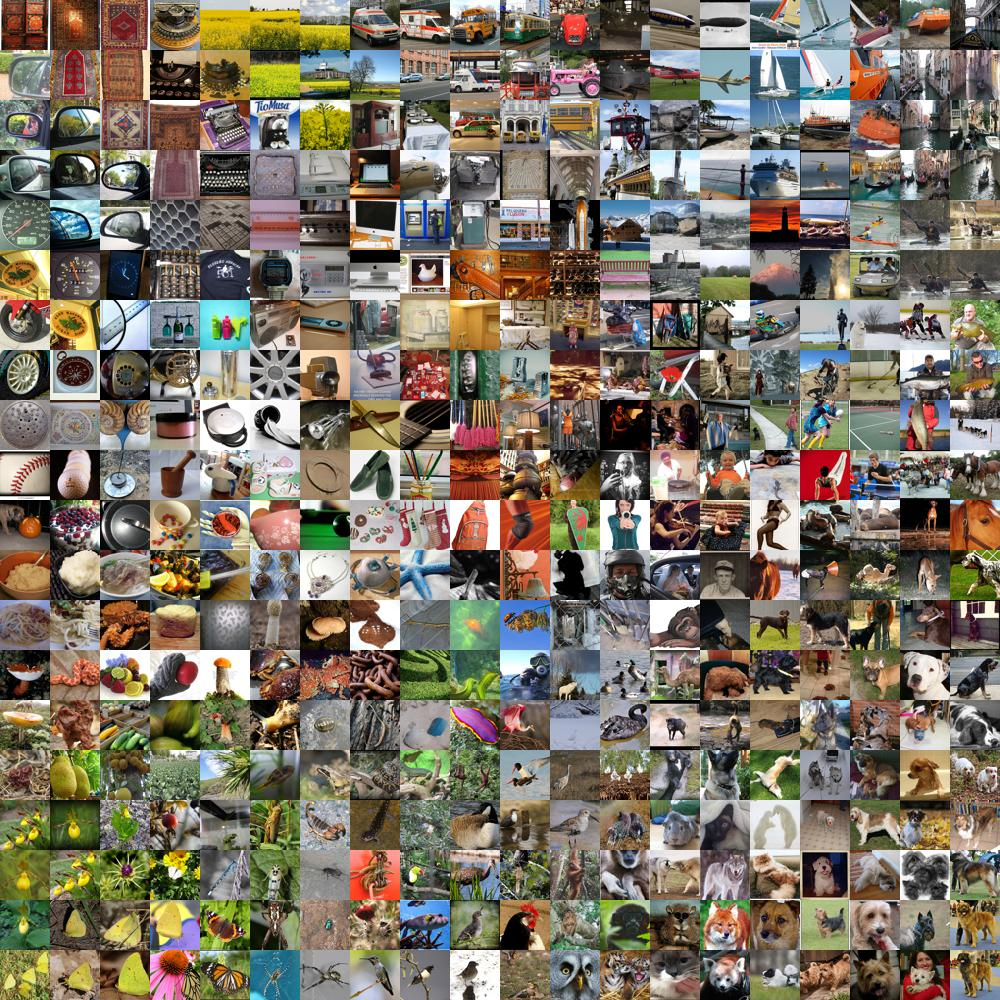


Keras kütüphanesinden import edilmesi gereknler : VGG16 eğitilmiş modeli

In [6]:
import numpy as np
from PIL import Image

from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input, decode_predictions

**Keras da daha önceden ImageNet veri kümesinde eğitilmiş bir modeli yükleme**

In [8]:
model = VGG16(weights = 'imagenet', include_top=True)

553467096/553467096 [==============================] - 16s 0us/step


**Model yapısına bir göz atalım:** Hangi katmanalr var ve katmanların özellikleri neler...

In [11]:
layers = dict([(layer.name, layer.output) for layer in model.layers])
layers

{'input_1': <KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_1')>,
 'block1_conv1': <KerasTensor: shape=(None, 224, 224, 64) dtype=float32 (created by layer 'block1_conv1')>,
 'block1_conv2': <KerasTensor: shape=(None, 224, 224, 64) dtype=float32 (created by layer 'block1_conv2')>,
 'block1_pool': <KerasTensor: shape=(None, 112, 112, 64) dtype=float32 (created by layer 'block1_pool')>,
 'block2_conv1': <KerasTensor: shape=(None, 112, 112, 128) dtype=float32 (created by layer 'block2_conv1')>,
 'block2_conv2': <KerasTensor: shape=(None, 112, 112, 128) dtype=float32 (created by layer 'block2_conv2')>,
 'block2_pool': <KerasTensor: shape=(None, 56, 56, 128) dtype=float32 (created by layer 'block2_pool')>,
 'block3_conv1': <KerasTensor: shape=(None, 56, 56, 256) dtype=float32 (created by layer 'block3_conv1')>,
 'block3_conv2': <KerasTensor: shape=(None, 56, 56, 256) dtype=float32 (created by layer 'block3_conv2')>,
 'block3_conv3': <KerasTensor: shape=(None, 

**Toplam parametre sayısıda bize fikir verebilir.**


In [12]:
model.count_params()

138357544

**Drive da bulunduğumuz klasörün içindeki test görüntülerimizin dosya isimlerini görelim ve test işlemi için bu görselleri çağıralım**


In [13]:
import os
os.chdir("/gdrive/My Drive/NesneTanimaBTK/images")

In [14]:
!ls

betty.jpg  f16.jpg  inek.jpg  olips3.jpeg  olips.jpeg  README.md  van-kedisi.jpg




**Bir test resmi yükleyelim ve ön işlemler yapalım.**


*   f16
*   İnek
*   Van kedisi
*   Olips



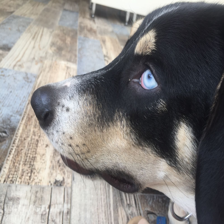

In [16]:
image_path = 'olips.jpeg'
image = Image.open(image_path)
image = image.resize((224, 224))
image

In [17]:
x = np.array(image, dtype='float32') # görüntüyü diziye çevirir
x = np.expand_dims(x, axis=0) # dizi listeisine çevirir
x = preprocess_input(x)

### TEST GÖRÜNTÜSÜ İLE SINIFLANDIRMA YAPMA

In [18]:
preds = model.predict(x)
print('predict:', decode_predictions(preds, top=3)[0])
print(decode_predictions(preds, top=1)[0][0][1])

35363/35363 [==============================] - 0s 0us/step
predict: [('n02088632', 'bluetick', 0.81589305), ('n02108000', 'EntleBucher', 0.06642745), ('n02107574', 'Greater_Swiss_Mountain_dog', 0.06301928)]
bluetick
